<a href="https://colab.research.google.com/github/Bhumika2104/Material-Classification/blob/main/Mineral_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d asiedubrempong/minerals-identification-dataset

Dataset URL: https://www.kaggle.com/datasets/asiedubrempong/minerals-identification-dataset
License(s): CC0-1.0
100% 230M/230M [00:02<00:00, 116MB/s] 
100% 230M/230M [00:02<00:00, 108MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/minerals-identification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
train_path = "/content/minet"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

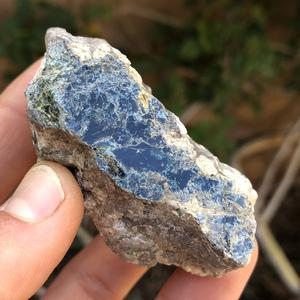

(300, 300, 3)

In [6]:
img = cv2.imread("/content/minet/biotite/0004.jpg")
cv2_imshow(img)
img.shape

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [8]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(300,300,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))




model.add(Flatten())

model.add(Dense(2000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(7,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 296, 296, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 146, 146, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 170528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │     341,058,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           7,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,161,847 (1.28 GB)

 Trainable params: 343,161,847 (1.28 GB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss = "categorical_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)



train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(300,300),
    class_mode='categorical',
    shuffle=True
)





Found 957 images belonging to 7 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))  # Match this to your target size in ImageDataGenerator
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more layers as needed
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before feeding it into dense layers
model.add(Flatten())

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 because you have 7 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
import numpy as np
import pandas as pd

In [18]:
test_img = cv2.imread('/content/minet/malachite/0008.jpg')
test_img = cv2.resize(test_img,(300,300))
test_input1 = test_img.reshape((1,300,300,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0


In [19]:
import os
folder = '/content/minet'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]

In [20]:
sub_folder[3]

'chrysocolla'